Documentation: https://altair-viz.github.io/getting_started/overview.html

**Note: You need to run this code in the command line before the above will work: conda install -c conda-forge altair vega_datasets notebook vega**

In [9]:
import altair as alt
import pandas as pd

alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

### Read the excel file and csv file into pandas dataframes
Look at your current working directory (!pwd) to know what filepath to pass into read_excel()

In [5]:
clinicaldf = pd.read_excel('UCEC_clinical_genotype_phenotype_V1.1.tsi.xlsx', sheet_name="CPTAC3_UCEC_clinical_genotypes_")
clinicaldf.drop(clinicaldf.index[0], inplace=True)
clinicaldf.head()

,idx,Histologic_Grade_(FIGO),Histologic_Type,Num_full_term_pregnancies,Tumor_Size_(cm),FIGO_stage,Myometrial_invasion_Specify,Diabetes,BMI,LVSI,...,PI3K-PTEN,PI3K-PIK3R2,TP53-ATM,TP53-TP53,TP53-TP53_pathway,HRD-BRCA1,HRD-BRCA1_or_BRCA2,HRD-BRCA2,MSI,POLE
1,C3L-00006,1,0,1,2.9,0,1,0,38.88,1,...,1,0,0,1,1,0,0,0,1,0
2,C3L-00008,1,0,1,3.5,0,1,0,39.76,0,...,1,0,0,0,0,0,0,0,1,0
3,C3L-00032,2,0,4,4.5,0,1,1,51.19,0,...,0,0,0,0,0,0,0,0,0,0
4,C3L-00090,2,0,4,3.5,0,1,1,32.69,0,...,1,0,0,0,0,0,0,0,0,0
5,C3L-00098,3,0,2,6,0,1,0,20.28,NaN,...,0,0,0,1,1,0,0,0,0,0


**Note: In order to read a .cct file, first change the extension to .csv then import into Excel (File --> import --> CSV File, choose file, select Delimited, click "Next", check the box next to "Space", click "Finish")**

In [6]:
phosdf = pd.read_excel('UCEC_phosphoproteomics_site_level_V1.xlsx', sheet_name="data")
phosdf.head()

,idx,C3L-00136.T,C3L-00098.T,C3L-00090.T,C3L-00008.T,C3L-00032.T,C3L-00006.T,C3L-00006.N,C3L-00139.T,C3L-00143.T,...,C3N-01349.T,C3N-03320.N,C3N-03411.N,NM_Mix1.N,C3N-03691a.N,C3N-03691b.N,C3N-03692.N,C3L-03601a.N,C3L-03601b.N,NM_Mix2.N
0,AAAS-S495,NaN,1.511548,1.112944,NaN,0.817520,NaN,NaN,1.418852,0.869111,...,0.987610,0.860698,0.567761,0.589163,0.655917,0.576749,0.945281,NaN,NaN,1.037036
1,AAK1-S18,0.879774,1.556005,NaN,0.692318,1.334778,0.821719,1.107258,1.336072,0.726407,...,1.004323,0.820971,0.930256,0.855603,1.676428,1.227982,1.139254,1.418611,1.994327,0.665400
2,AAK1-S20,0.696099,0.964754,0.687200,0.453538,0.966963,1.352040,0.905931,1.302045,0.880087,...,1.000152,1.166823,0.965710,0.966570,1.344240,1.650865,0.975370,0.928651,1.861469,0.550828
3,AAK1-S21,0.914304,0.949023,0.887574,1.068494,0.956485,1.434344,1.136394,1.239891,0.573554,...,0.598483,0.654774,NaN,0.553720,NaN,1.086362,0.659436,1.007299,1.331197,0.590478
4,AAK1-S624,2.024795,1.103993,1.153816,0.631918,0.977280,0.615934,0.759955,0.856731,1.114945,...,0.969571,1.067636,1.047008,0.831194,0.904264,1.051562,0.950879,0.718730,1.412013,0.764690


### Make a scatter plot

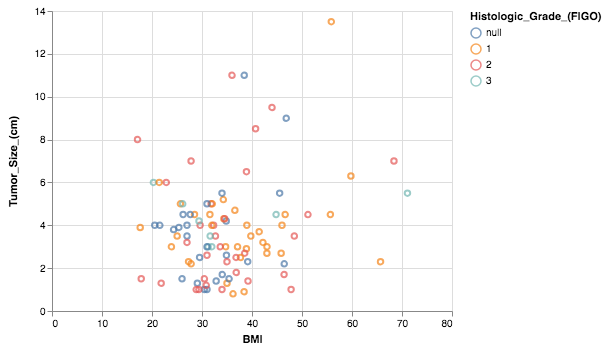

In [12]:
alt.Chart(clinicaldf).mark_point().encode(
    alt.X('BMI', type='quantitative'),
    alt.Y('Tumor_Size_(cm)', type='quantitative'),
    alt.Color('Histologic_Grade_(FIGO)', type='nominal')
).interactive()

### Bar chart

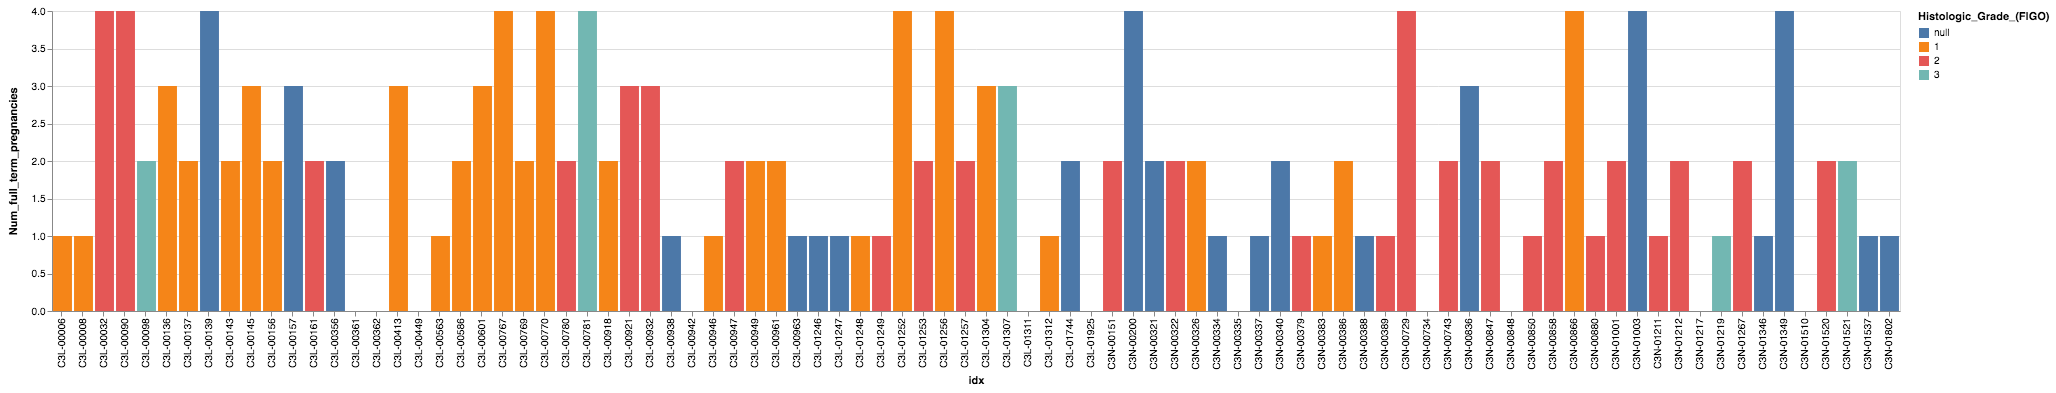

In [16]:
alt.Chart(clinicaldf).mark_bar().encode(
    alt.X('idx', type='nominal'),
    alt.Y('Num_full_term_pregnancies'),
    alt.Color('Histologic_Grade_(FIGO)', type='nominal')
)